<h1><center>PRODIGY INFOTECH - DATA SCIENCE INTERNSHIP</center></h1>

<h2 align="right">~ Ashish Ransing</h2> 

#  --------------------------------------------------------------------------------------------------------------

### TASK - 5 : Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

#  --------------------------------------------------------------------------------------------------------------

### Importing Modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#  --------------------------------------------------------------------------------------------------------------

### Loading and Understanding the Dataset

In [6]:
df = pd.read_csv("US_Accidents_March23.csv")

In [7]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.shape

(7728394, 46)

In [10]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [12]:
#Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


#  --------------------------------------------------------------------------------------------------------------

### Data Cleaning

In [13]:
#Checking for Null Values
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [14]:
#Handling Null values
df = df.fillna(0)

In [15]:
#Rechecking for Null values
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [16]:
#Convert time columns to datetime objects
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [17]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.0,0.0,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.0,0.0,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.0,0.0,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.0,0.0,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.0,0.0,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


#  --------------------------------------------------------------------------------------------------------------

### Exploratory Data Analysis (EDA)

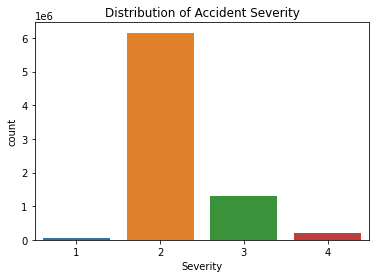

In [18]:
# Visualizing accident severity distribution
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

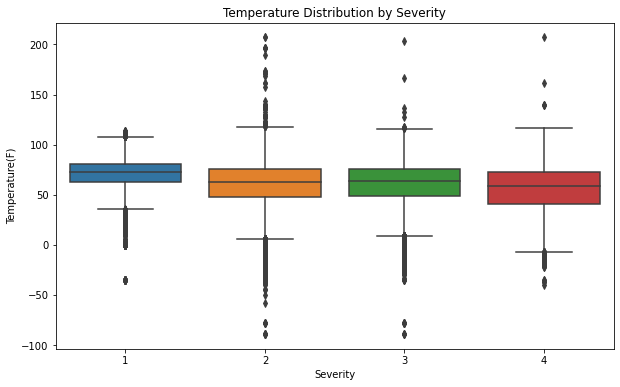

In [19]:
#Box plot of temperature by severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Temperature Distribution by Severity')
plt.show()

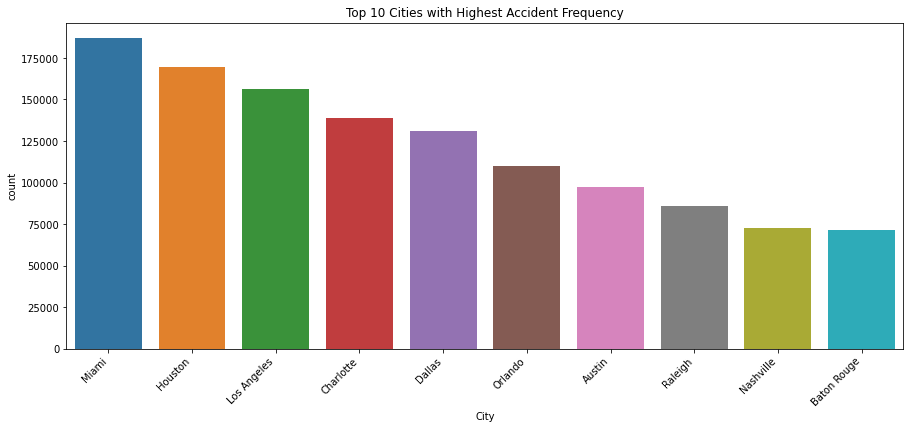

In [20]:
# Visualizing accidents by city
plt.figure(figsize=(15, 6))
sns.countplot(x='City', data=df, order=df['City'].value_counts().index[:10])
plt.title('Top 10 Cities with Highest Accident Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

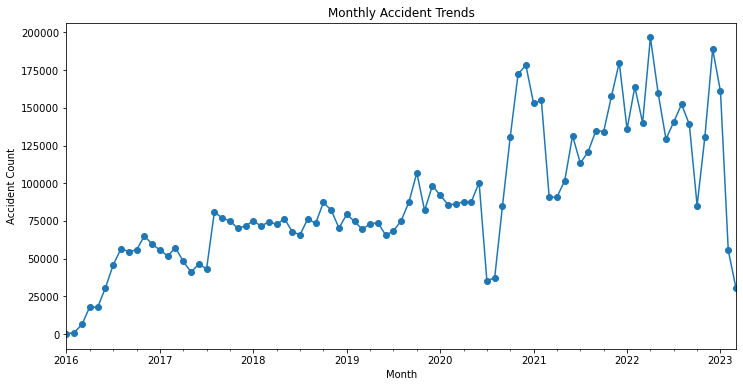

In [21]:
# Resampling data to monthly frequency and plot
monthly_accidents = df.resample('M', on='Start_Time').size()
monthly_accidents.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Accident Trends')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

#  --------------------------------------------------------------------------------------------------------------

### Time Analysis

In [22]:
# Extracting hour, day, and month from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month

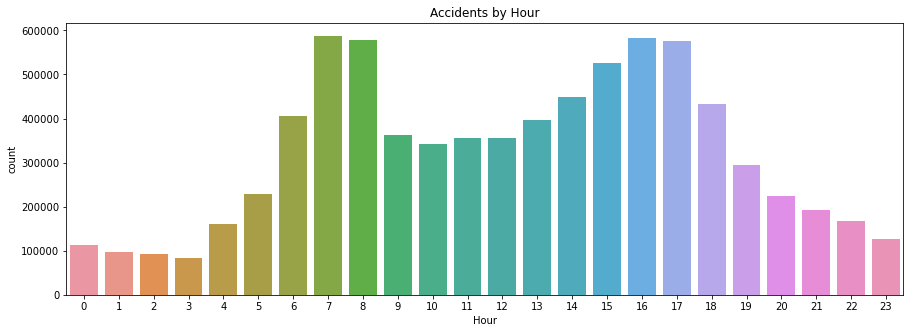

In [23]:
# Visualizing accident trends by hour, day, and month
plt.figure(figsize=(15, 5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour')
plt.show()

#  --------------------------------------------------------------------------------------------------------------

### Road Condition and Location Analysis

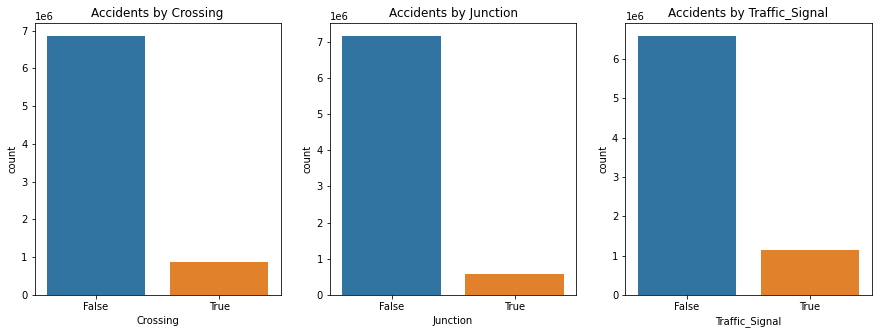

In [24]:
# Visualizing accidents by road features
road_features = ['Crossing', 'Junction', 'Traffic_Signal']

plt.figure(figsize=(15, 5))
for feature in road_features:
    plt.subplot(1, len(road_features), road_features.index(feature) + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Accidents by {feature}')
plt.show()

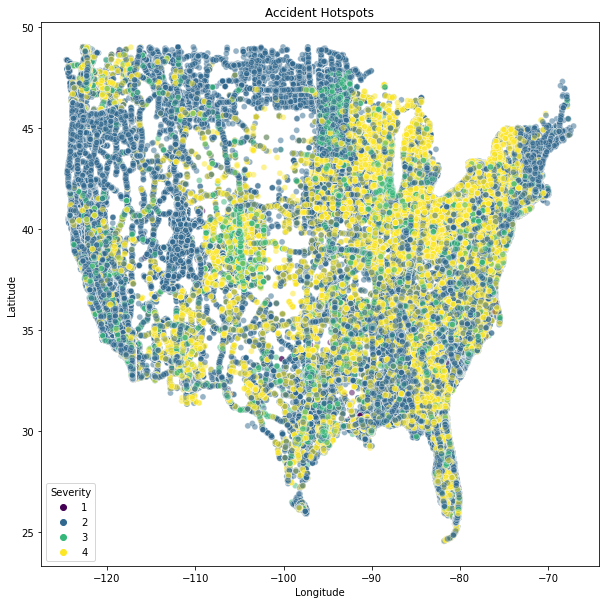

In [29]:
#Creating a choropleth map using Plotly Express to visualize the number of accidents by state
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='Severity', palette='viridis', alpha=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#  --------------------------------------------------------------------------------------------------------------

### Weather Analysis

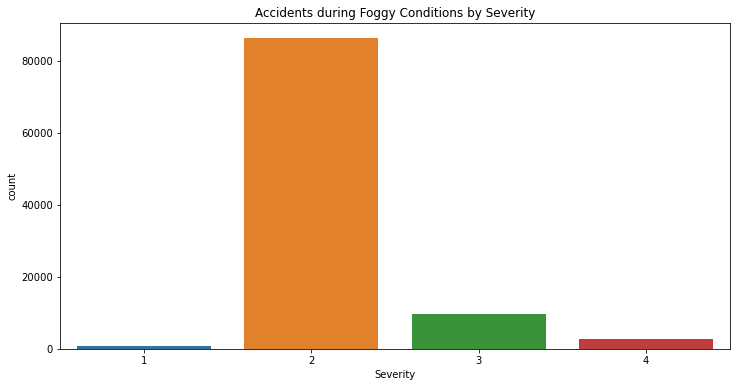

In [25]:
# Visualize accidents during foggy conditions
foggy_accidents = df[df['Weather_Condition'] == 'Fog']
plt.figure(figsize=(12, 6))
sns.countplot(x='Severity', data=foggy_accidents)
plt.title('Accidents during Foggy Conditions by Severity')
plt.show()

In [41]:
#Calculating percentages, and displaying the first 5 rows of the resulting DataFrame 'weather'.
weather = df.Weather_Condition.value_counts().reset_index()
weather.columns = ['Weather_Condition','Accidents']
weather['Percentage'] = round(weather['Accidents'] * 100 /weather['Accidents'].sum() , 2)
weather.head(5)

,Weather_Condition,Accidents,Percentage
0,Fair,2560802,33.13
1,Mostly Cloudy,1016195,13.15
2,Cloudy,817082,10.57
3,Clear,808743,10.46
4,Partly Cloudy,698972,9.04


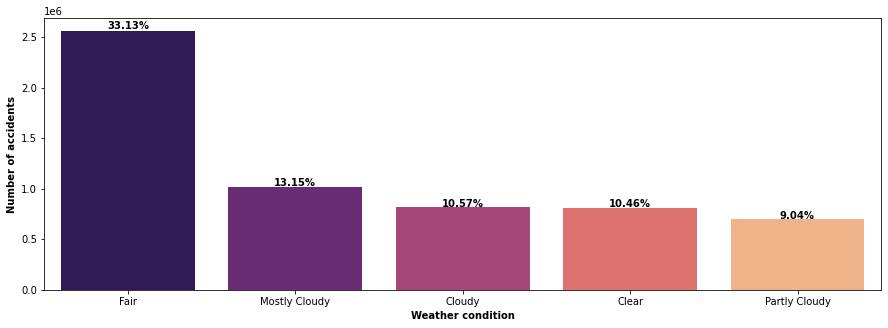

In [42]:
#Barplot of weather condition and number of accidents
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(x='Weather_Condition',y='Accidents',data=weather.head(5),palette="magma")
plt.xlabel("Weather condition",ha='center',weight='bold')
plt.ylabel("Number of accidents",ha='center',weight='bold')


i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(weather.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

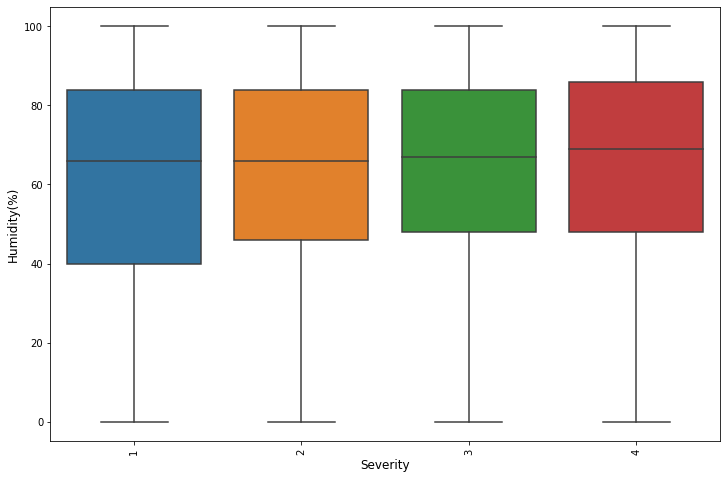

In [43]:
#Boxplot of severity and humidity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Humidity(%)", data=df)
plt.ylabel('Humidity(%)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

#  --------------------------------------------------------------------------------------------------------------